In [1]:
# prepare
import pandas as pd
import numpy as np
import acquire
import prep

# visualize and explore
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)
from scipy import stats

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
import env


In [2]:
telco_df = acquire.get_telco_data()

In [3]:
pd.isnull(telco_df).sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [4]:
train, validate, test = prep.prep_telco(telco_df)
train.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4752,1,2,1,6692-UDPJC,Female,0,Yes,Yes,14,Yes,...,Yes,Yes,No,Yes,91.65,1301,Yes,Month-to-month,Fiber optic,Electronic check
1546,3,1,3,2256-YLYLP,Male,0,Yes,Yes,68,Yes,...,Yes,Yes,Yes,Yes,72.95,4953.25,No,Two year,DSL,Bank transfer (automatic)
4604,2,3,1,6490-FGZAT,Male,0,No,No,6,Yes,...,No internet service,No internet service,No internet service,No,20.65,109.3,No,Month-to-month,None,Mailed check


<AxesSubplot:>

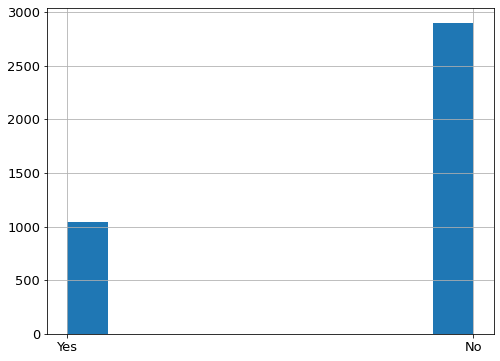

In [5]:
train.churn.hist()

### Question 1 -  Do customers who use Tech Support churn at a significantly different rate and if so is it more or less?

In [6]:
alpha = 0.05

- $H_0$ : Null hypothesis - "Customers who use Tech Support do not churn at a rate significantly different than those who don't use Tech Support."
- $H_a$ : Alternative hypothesis - "Customers utilizing Tech Support churn at a significantly different rate than non-Tech Support users."

In [7]:
train.tech_support.unique()

array(['Yes', 'No internet service', 'No'], dtype=object)

In [8]:
tech_sup_xtab = pd.crosstab(train.tech_support, train.churn)
tech_sup_xtab

churn,No,Yes
tech_support,,
No,1133,808
No internet service,799,66
Yes,965,172


In [9]:
tech_sup_xtab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, No to Yes
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   No      3 non-null      int64
 1   Yes     3 non-null      int64
dtypes: int64(2)
memory usage: 72.0+ bytes


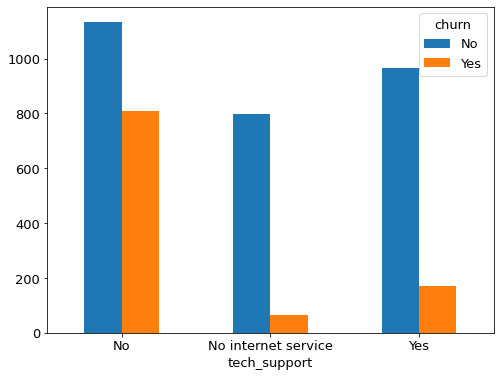

In [10]:
barplot = tech_sup_xtab.plot.bar(rot=0)

In [11]:
chi2, p, degf, expected = stats.chi2_contingency(tech_sup_xtab) # assigned 4 variables because the function returns 4 values although all we really want is the p value
p

6.487317204893711e-101

In [12]:
if p < alpha:
        print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


- **Answer 1** - I fail to reject the null hypothesis due to the extremely small p-value from given by the Chi Square statistical test which is well below the set alpha of 0.05. 
- Based on the crosstabulation and visualization it clearly shows that those with no Tech Support churn at a much higher rate than those who do receive Tech Support.
- Key takeaway is that offering Tech support appears to significantly reduce the churn rate among customers.
- Next step would be to make sure all customers know about Tech Support and make it easily accesible. Also make sure to offer Tech Support services to customers attempting to churn in circumstances where it makes sense.

### Question 2 - What are the differences in churn rates for 1 and 2 year contracts as compared to month-to-month contracts?

In [13]:
# - $H_0$ : Null hypothesis - "There's no significant different in churn rates between month-to-month customers and those with longer contracts"
# - $H_a$ : Alternative hypothesis - "There is a statistically significant difference in regards to churn rates for month-to-month customers versus those with longer contracts"

In [14]:
train.head(10)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4752,1,2,1,6692-UDPJC,Female,0,Yes,Yes,14,Yes,...,Yes,Yes,No,Yes,91.65,1301,Yes,Month-to-month,Fiber optic,Electronic check
1546,3,1,3,2256-YLYLP,Male,0,Yes,Yes,68,Yes,...,Yes,Yes,Yes,Yes,72.95,4953.25,No,Two year,DSL,Bank transfer (automatic)
4604,2,3,1,6490-FGZAT,Male,0,No,No,6,Yes,...,No internet service,No internet service,No internet service,No,20.65,109.3,No,Month-to-month,None,Mailed check
6166,4,1,1,8735-DCXNF,Male,0,Yes,No,10,Yes,...,Yes,No,No,Yes,54.95,568.85,No,Month-to-month,DSL,Credit card (automatic)
4001,1,2,1,5647-FXOTP,Female,1,Yes,No,60,Yes,...,No,Yes,Yes,Yes,105.90,6401.25,No,Month-to-month,Fiber optic,Electronic check
429,2,3,3,0625-AFOHS,Female,0,Yes,Yes,29,Yes,...,No internet service,No internet service,No internet service,No,20.20,558.8,No,Two year,None,Mailed check
3464,3,2,1,4910-AQFFX,Male,0,Yes,Yes,9,Yes,...,No,No,No,Yes,79.35,661.25,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
4239,3,2,1,5981-ITEMU,Male,0,Yes,No,40,Yes,...,No,Yes,Yes,Yes,97.10,3706.95,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
6325,4,3,3,8957-THMOA,Female,0,No,Yes,50,Yes,...,No internet service,No internet service,No internet service,No,20.15,970.85,No,Two year,None,Credit card (automatic)
774,3,3,2,1131-ALZWV,Female,0,No,No,24,Yes,...,No internet service,No internet service,No internet service,No,24.60,605.25,No,One year,None,Bank transfer (automatic)


In [15]:
train.contract_type.unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [16]:
# apparently contract is abbreviated with just "K" in law circles
k_type_xtab = pd.crosstab(train.contract_type, train.churn)
k_type_xtab

churn,No,Yes
contract_type,,
Month-to-month,1223,924
One year,750,95
Two year,924,27


In [17]:
chi2, p, degf, expected = stats.chi2_contingency(k_type_xtab) # assigned 4 variables because the function returns 4 values although all we really want is the p value
p

2.2731913942531593e-147

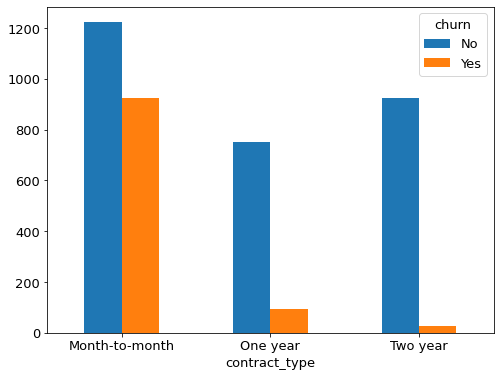

In [18]:
barplot = k_type_xtab.plot.bar(rot=0)

In [19]:
two_yrs_plus = train[train.tenure >= 24]

In [20]:
k_type_3x2yrs_plus = two_yrs_plus[two_yrs_plus.contract_type_id == 3]

In [21]:
k_type_3x2yrs_plus_xtab = pd.crosstab(k_type_3x2yrs_plus.contract_type, k_type_3x2yrs_plus.churn)
k_type_3x2yrs_plus_xtab

churn,No,Yes
contract_type,,
Two year,851,27


In [22]:
lessthan_2yrs = train[train.tenure < 24]

In [23]:
k_type_3xlessthan_2yrs = lessthan_2yrs[lessthan_2yrs.contract_type_id == 3]

In [24]:
k_type_3xlessthan_2yrs_xtab = pd.crosstab(k_type_3xlessthan_2yrs.contract_type, k_type_3xlessthan_2yrs.churn)
k_type_3xlessthan_2yrs_xtab

churn,No
contract_type,
Two year,73


In [25]:
one_yr_plus = train[train.tenure >= 12]

In [26]:
k_type_2x1yr_plus = one_yr_plus[one_yr_plus.contract_type_id == 2]

In [27]:
k_type_2x1yr_plus_xtab = pd.crosstab(k_type_2x1yr_plus.contract_type, k_type_2x1yr_plus.churn)
k_type_2x1yr_plus_xtab

churn,No,Yes
contract_type,,
One year,691,91


In [28]:
lessthan_1yr = train[train.tenure < 12]

In [29]:
k_type_2xlessthan_1yr = lessthan_1yr[lessthan_1yr.contract_type_id == 2]

In [30]:
k_type_2xlessthan_1yr_xtab = pd.crosstab(k_type_2xlessthan_1yr.contract_type, k_type_2xlessthan_1yr.churn)
k_type_2xlessthan_1yr_xtab

churn,No,Yes
contract_type,,
One year,59,4


In [31]:
one_mo_plus = train[train.tenure >= 1]
k_type_1x1_mo_plus = one_mo_plus[one_mo_plus.contract_type_id == 1]

In [32]:
k_type_1x1_mo_plus_xtab = pd.crosstab(k_type_1x1_mo_plus.contract_type, k_type_1x1_mo_plus.churn)
k_type_1x1_mo_plus_xtab

churn,No,Yes
contract_type,,
Month-to-month,1223,924


In [33]:
lessthan_1mo = train[train.tenure < 1]
k_type_1xlessthan_1mo = lessthan_1mo[lessthan_1mo.contract_type_id == 1]
lessthan_1mo
# No month-to-month customers with less than a month of service in, but a 1 yr and 5, 2 yr contracts in this training set

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2855,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
5433,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check
1731,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
2176,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
4054,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
2025,2,3,2,2923-ARZLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check


In [34]:
k_type_3x2yrs_plus_xtab = pd.crosstab(k_type_3x2yrs_plus.contract_type, k_type_3x2yrs_plus.churn)
k_type_3x2yrs_plus_xtab

churn,No,Yes
contract_type,,
Two year,851,27


In [35]:
k_type_3xlessthan_2yrs_xtab = pd.crosstab(k_type_3xlessthan_2yrs.contract_type, k_type_3xlessthan_2yrs.churn)
k_type_3xlessthan_2yrs_xtab

churn,No
contract_type,
Two year,73


In [36]:
k_type_2x1yr_plus_xtab = pd.crosstab(k_type_2x1yr_plus.contract_type, k_type_2x1yr_plus.churn, normalize='index')
k_type_2x1yr_plus_xtab

churn,No,Yes
contract_type,,
One year,0.883632,0.116368


In [37]:
k_type_2xlessthan_1yr_xtab = pd.crosstab(k_type_2xlessthan_1yr.contract_type, k_type_2xlessthan_1yr.churn)
k_type_2xlessthan_1yr_xtab

churn,No,Yes
contract_type,,
One year,59,4


In [38]:
k_type_1x1_mo_plus_xtab = pd.crosstab(k_type_1x1_mo_plus.contract_type, k_type_1x1_mo_plus.churn)
k_type_1x1_mo_plus_xtab

churn,No,Yes
contract_type,,
Month-to-month,1223,924


In [39]:
merged_df = pd.concat([k_type_3x2yrs_plus_xtab, k_type_3xlessthan_2yrs_xtab, k_type_2x1yr_plus_xtab, k_type_2xlessthan_1yr_xtab, k_type_1x1_mo_plus_xtab])
merged_df

churn,No,Yes
contract_type,,
Two year,851.000000,27.000000
Two year,73.000000,NaN
One year,0.883632,0.116368
One year,59.000000,4.000000
Month-to-month,1223.000000,924.000000


In [40]:
merged_df.fillna(0)

churn,No,Yes
contract_type,,
Two year,851.000000,27.000000
Two year,73.000000,0.000000
One year,0.883632,0.116368
One year,59.000000,4.000000
Month-to-month,1223.000000,924.000000


In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Two year to Month-to-month
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      5 non-null      float64
 1   Yes     4 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


In [42]:
chi2, p, degf, expected = stats.chi2_contingency(merged_df) # assigned 4 variables because the function returns 4 values although all we really want is the p value
chi2, p, degf, expected

(nan,
 nan,
 4,
 array([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]]))

<AxesSubplot:xlabel='contract_type'>

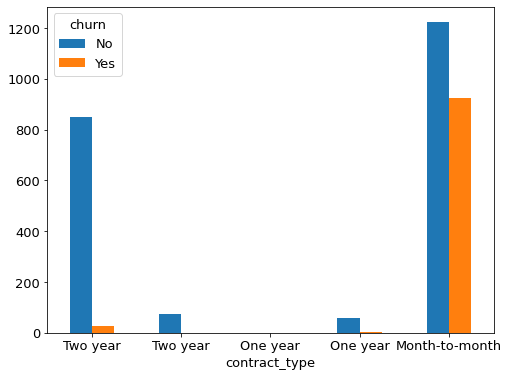

In [43]:
merged_df.plot.bar(rot=0)

- **Answer 2** - I found differences in the churn rates of customers who did and didn't fulfill the obligated length of their contracts
- Those who stayed for the length of their 1 or 2 year contracts had a higher churn rates compared those who haven't finished their contract.
- Month-to-month customers had much higher rates of churn compared to the longer contracts
- The training data shows no month-to-month customers staying for less than a month but there were some from the 1 and 2 year contracts.
- The barplot shows the comparison of the different contract types we have.
- Key takeaways are that month-to-month customers churn at a much higher rate than other contract types.  Two year contracts appear to have the best retention rates.
- Next step would be to offer incentives for month-to-month customers to become one or preferably two year contract customers.

### Question 3 - What groups of customers pay the most in monthly charges but aren't churning?

In [44]:
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4752,1,2,1,6692-UDPJC,Female,0,Yes,Yes,14,Yes,...,Yes,Yes,No,Yes,91.65,1301,Yes,Month-to-month,Fiber optic,Electronic check
1546,3,1,3,2256-YLYLP,Male,0,Yes,Yes,68,Yes,...,Yes,Yes,Yes,Yes,72.95,4953.25,No,Two year,DSL,Bank transfer (automatic)
4604,2,3,1,6490-FGZAT,Male,0,No,No,6,Yes,...,No internet service,No internet service,No internet service,No,20.65,109.3,No,Month-to-month,None,Mailed check
6166,4,1,1,8735-DCXNF,Male,0,Yes,No,10,Yes,...,Yes,No,No,Yes,54.95,568.85,No,Month-to-month,DSL,Credit card (automatic)
4001,1,2,1,5647-FXOTP,Female,1,Yes,No,60,Yes,...,No,Yes,Yes,Yes,105.90,6401.25,No,Month-to-month,Fiber optic,Electronic check


In [46]:
# Average monthly charges for train data
train.monthly_charges.mean()

64.4740045650519

In [47]:
# Total percentage of churn for train data
((train.churn == 'Yes').sum()/len(train))


0.2652802434694395

In [48]:
train.monthly_charges.sum()

254221.0

In [49]:
# gets the top 5% on customers with highest monthly charges
top_5_pct = train.nlargest(math.floor(.05*(len(train))),'monthly_charges')

In [50]:
# Average of the top 5% of monthly charges from train data
top_5_pct.monthly_charges.mean()

111.22791878172593

In [51]:
top_5_pct_xtab = pd.crosstab(top_5_pct.shape[0], top_5_pct.churn)
top_5_pct_xtab

churn,No,Yes
row_0,,
197,160,37


<AxesSubplot:xlabel='row_0'>

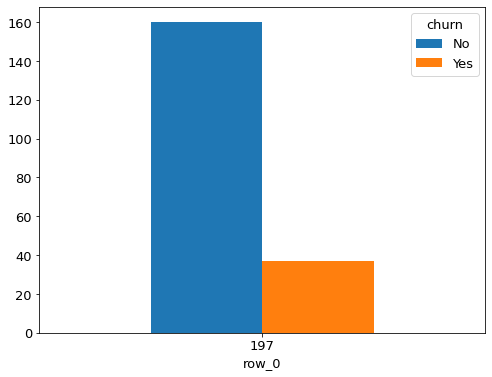

In [52]:
top_5_pct_xtab.plot.bar(rot=0)

In [53]:
# Get top 5% from those who don't churn
top_5_pct_no_churn = top_5_pct[top_5_pct.churn == 'No']
top_5_pct_no_churn.head(160)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
6345,1,2,3,8984-HPEMB,Female,0,No,No,71,Yes,...,Yes,Yes,Yes,Yes,118.65,8477.6,No,Two year,Fiber optic,Electronic check
4903,4,2,3,6904-JLBGY,Female,1,No,No,72,Yes,...,Yes,Yes,Yes,Yes,117.35,8436.25,No,Two year,Fiber optic,Credit card (automatic)
2988,4,2,2,4282-MSACW,Male,0,No,No,68,Yes,...,Yes,Yes,Yes,Yes,117.20,8035.95,No,One year,Fiber optic,Credit card (automatic)
6892,4,2,3,9788-HNGUT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,116.95,8594.4,No,Two year,Fiber optic,Credit card (automatic)
1029,3,2,3,1488-PBLJN,Female,0,Yes,Yes,72,Yes,...,Yes,Yes,Yes,Yes,116.85,8477.7,No,Two year,Fiber optic,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,3,2,2,9659-ZTWSM,Male,1,Yes,No,66,Yes,...,Yes,Yes,Yes,Yes,107.35,7051.95,No,One year,Fiber optic,Bank transfer (automatic)
4836,1,2,2,6815-ABQFQ,Male,0,Yes,No,56,Yes,...,Yes,Yes,Yes,Yes,107.25,6033.3,No,One year,Fiber optic,Electronic check
6046,4,2,2,8565-HBFNN,Male,0,Yes,No,69,Yes,...,Yes,No,Yes,Yes,107.20,7317.1,No,One year,Fiber optic,Credit card (automatic)
3310,1,2,1,4716-HHKQH,Male,1,Yes,No,20,Yes,...,Yes,Yes,Yes,No,107.05,2172.05,No,Month-to-month,Fiber optic,Electronic check


In [54]:
top_5_pct_no_churn.columns.tolist()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [55]:
clean_top_5_pct = prep.clean_telco_cat(top_5_pct)
clean_top_5_pct

,senior_citizen,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6345,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0
5824,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0
1579,1,0,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0
4903,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0
2988,0,1,0,0,1,1,1,1,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,1,1,1,0,1,0,1,1,1,1,1,0,1,0,0,0,0
4836,0,1,1,0,1,0,1,0,1,1,1,0,1,0,0,1,0
6046,0,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0
3310,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0


In [56]:
top_5_pct['internet_service_type'].unique()

array(['Fiber optic'], dtype=object)

In [57]:
retrain = prep.clean_telco_cat(train)
revalidate = prep.clean_telco_cat(validate)
retest = prep.clean_telco_cat(test)
retest

,senior_citizen,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1251,0,1,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
3800,0,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
1858,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
6432,0,1,1,0,1,0,1,0,0,0,...,1,1,0,1,0,0,0,0,1,0
3317,0,1,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,1,1,0,0
740,0,1,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
6202,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6963,0,0,1,1,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0


In [58]:
X_train = retrain.drop(columns=['churn_Yes'])
y_train = retrain['churn_Yes'].map({1: 'churned', 0: 'stayed'})

X_validate = revalidate.drop(columns=['churn_Yes'])
y_validate = revalidate['churn_Yes'].map({1: 'churned', 0: 'stayed'})

X_test = retest.drop(columns=['churn_Yes'])
y_test = retest['churn_Yes'].map({1: 'churned', 0: 'stayed'})

In [59]:
baseline = y_train.mode()
matches_baseline_prediction = y_train == 0
baseline_accuracy = matches_baseline_prediction.mean()
baseline_accuracy

0.0

In [60]:
# Make Random Forest model
reforest = RandomForestClassifier(max_depth=6, random_state=321)

In [61]:
reforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=321)

In [62]:
np.round(reforest.feature_importances_, 3)

array([0.01 , 0.007, 0.026, 0.016, 0.003, 0.004, 0.008, 0.014, 0.066,
       0.028, 0.033, 0.019, 0.012, 0.011, 0.1  , 0.032, 0.005, 0.024,
       0.006, 0.025, 0.099, 0.172, 0.138, 0.028, 0.016, 0.094, 0.007])

In [63]:
y_pred = reforest.predict(X_train)
y_pred

array(['stayed', 'stayed', 'stayed', ..., 'stayed', 'churned', 'churned'],
      dtype=object)

In [64]:
y_pred_proba = reforest.predict_proba(X_train)
y_pred_proba

array([[0.43701448, 0.56298552],
       [0.08142478, 0.91857522],
       [0.1938373 , 0.8061627 ],
       ...,
       [0.26125433, 0.73874567],
       [0.5954444 , 0.4045556 ],
       [0.58067845, 0.41932155]])

In [65]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(reforest.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.78


In [66]:
print(confusion_matrix(y_train, y_pred))


[[ 358  688]
 [ 190 2707]]


In [67]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     churned       0.65      0.34      0.45      1046
      stayed       0.80      0.93      0.86      2897

    accuracy                           0.78      3943
   macro avg       0.73      0.64      0.65      3943
weighted avg       0.76      0.78      0.75      3943



In [68]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(reforest.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.79


### KNN

In [69]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
y_pred = knn.predict(X_train)

In [72]:
y_pred_proba = knn.predict_proba(X_train)

In [73]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.81


In [74]:
print(confusion_matrix(y_train, y_pred))

[[ 648  398]
 [ 335 2562]]


In [75]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     churned       0.66      0.62      0.64      1046
      stayed       0.87      0.88      0.87      2897

    accuracy                           0.81      3943
   macro avg       0.76      0.75      0.76      3943
weighted avg       0.81      0.81      0.81      3943



In [76]:
clf = DecisionTreeClassifier(max_depth=6, random_state=321)

In [77]:
# plt.figure(figsize=(13, 7))
# plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)


In [78]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

In [79]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array(['stayed', 'stayed', 'stayed', 'stayed', 'churned'], dtype=object)

In [80]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.46296296, 0.53703704],
       [0.        , 1.        ],
       [0.20164609, 0.79835391],
       [0.28030303, 0.71969697],
       [0.65046729, 0.34953271]])

In [81]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.78


In [82]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[ 542,  504],
       [ 361, 2536]])

In [83]:
y_train.value_counts()

stayed     2897
churned    1046
Name: churn_Yes, dtype: int64

In [84]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     churned       0.60      0.52      0.56      1046
      stayed       0.83      0.88      0.85      2897

    accuracy                           0.78      3943
   macro avg       0.72      0.70      0.71      3943
weighted avg       0.77      0.78      0.78      3943



In [85]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.78


In [86]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

     churned       0.60      0.57      0.58       449
      stayed       0.85      0.86      0.85      1242

    accuracy                           0.78      1691
   macro avg       0.72      0.71      0.72      1691
weighted avg       0.78      0.78      0.78      1691



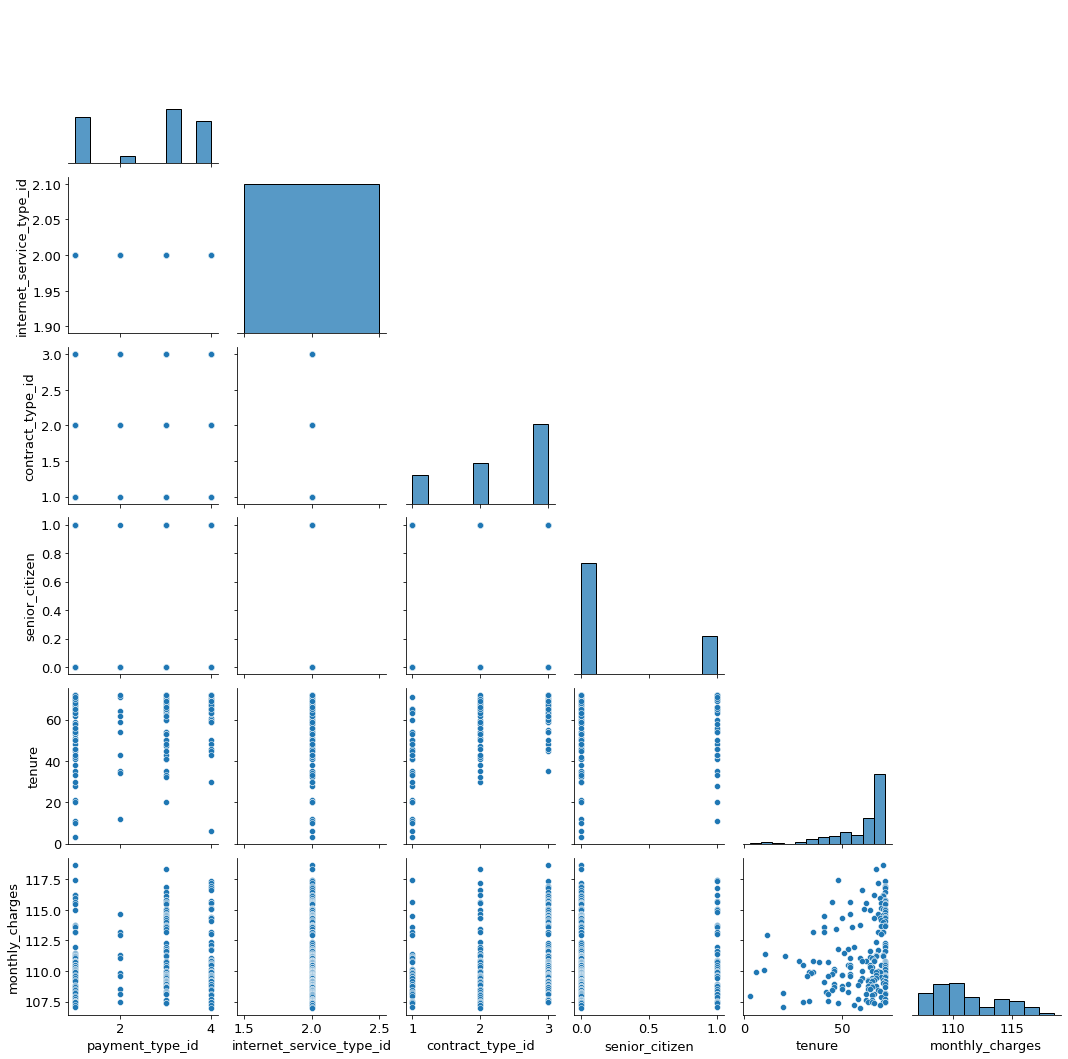

In [87]:
# pair plot of non-churners from the top 5 pct of monthly charges from all customers in train dataset
sns.pairplot(top_5_pct, corner=True)

In [88]:
(top_5_pct.churn == 'Yes').sum(), (top_5_pct.churn == 'No').sum()

(37, 160)

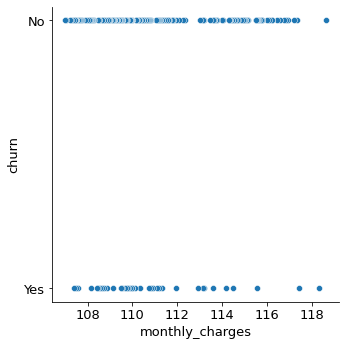

In [89]:
sns.relplot(x='monthly_charges', y='churn', data=top_5_pct)

### Question 4 - ~~What services offered show the lowest rates of overall churn?~~

In [90]:
import util

In [91]:
train.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4752,1,2,1,6692-UDPJC,Female,0,Yes,Yes,14,Yes,...,Yes,Yes,No,Yes,91.65,1301,Yes,Month-to-month,Fiber optic,Electronic check
1546,3,1,3,2256-YLYLP,Male,0,Yes,Yes,68,Yes,...,Yes,Yes,Yes,Yes,72.95,4953.25,No,Two year,DSL,Bank transfer (automatic)
4604,2,3,1,6490-FGZAT,Male,0,No,No,6,Yes,...,No internet service,No internet service,No internet service,No,20.65,109.3,No,Month-to-month,None,Mailed check


In [92]:
train_service = prep.telco_clean_services(train)
validate_service = prep.telco_clean_services(validate)
test_service = prep.telco_clean_services(test)
train_service

,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,churn,internet_service_type
4752,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Yes,Fiber optic
1546,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,DSL
4604,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,No,None
6166,Yes,No,Yes,No,No,Yes,No,No,Yes,No,DSL
4001,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...
6346,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,DSL
5969,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,No,None
405,Yes,No,Yes,No,No,No,Yes,Yes,Yes,No,DSL
3288,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Yes,Fiber optic


In [93]:
train_freq = util.frequency(train_service,['churn', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type'])
train_freq

,churn,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_type,Count,Percent
0,No,No,No phone service,No,No,No,No,No,No,No,DSL,12,0.003043
1,Yes,No,No phone service,No,No,No,No,No,No,No,DSL,7,0.001775
2,No,No,No phone service,No,No,No,No,No,No,Yes,DSL,15,0.003804
3,Yes,No,No phone service,No,No,No,No,No,No,Yes,DSL,14,0.003551
4,No,No,No phone service,No,No,No,No,No,Yes,No,DSL,2,0.000507
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Fiber optic,2,0.000507
1164,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,DSL,26,0.006594
1165,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,DSL,0,0.000000
1166,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Fiber optic,40,0.010145


In [94]:
train_freq.sort_values('Percent', ascending=False).head(20)

# shows group with least churn is one with only. a single line of phone_service at 11.4%. Not very useful or profitable to stakeholders.

,churn,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_type,Count,Percent
462,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,None,450,0.114126
464,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,None,161,0.040832
926,No,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,None,116,0.029419
928,No,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,None,72,0.018260
229,Yes,Yes,No,No,No,No,No,No,No,Yes,Fiber optic,63,0.015978
703,Yes,Yes,Yes,No,No,No,No,No,No,Yes,Fiber optic,45,0.011413
463,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,None,40,0.010145
1166,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Fiber optic,40,0.010145
924,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Fiber optic,39,0.009891
228,No,Yes,No,No,No,No,No,No,No,Yes,Fiber optic,39,0.009891


### Question 4 - ~~What's the likelihood that a customer will churn in the next month or year?~~
- Does nothing to help identify why people are churning

In [95]:
train.head(1)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4752,1,2,1,6692-UDPJC,Female,0,Yes,Yes,14,Yes,...,Yes,Yes,No,Yes,91.65,1301,Yes,Month-to-month,Fiber optic,Electronic check


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4752 to 6731
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           3943 non-null   int64  
 1   internet_service_type_id  3943 non-null   int64  
 2   contract_type_id          3943 non-null   int64  
 3   customer_id               3943 non-null   object 
 4   gender                    3943 non-null   object 
 5   senior_citizen            3943 non-null   int64  
 6   partner                   3943 non-null   object 
 7   dependents                3943 non-null   object 
 8   tenure                    3943 non-null   int64  
 9   phone_service             3943 non-null   object 
 10  multiple_lines            3943 non-null   object 
 11  online_security           3943 non-null   object 
 12  online_backup             3943 non-null   object 
 13  device_protection         3943 non-null   object 
 14  tech_

In [97]:
train['tenure'].sum()

127656

In [98]:
train['tenure'].sum()/len(train)

32.3753487192493

In [99]:
churn_df = train[train.churn == 'Yes']
churn_df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4752,1,2,1,6692-UDPJC,Female,0,Yes,Yes,14,Yes,...,Yes,Yes,No,Yes,91.65,1301,Yes,Month-to-month,Fiber optic,Electronic check
3464,3,2,1,4910-AQFFX,Male,0,Yes,Yes,9,Yes,...,No,No,No,Yes,79.35,661.25,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
4239,3,2,1,5981-ITEMU,Male,0,Yes,No,40,Yes,...,No,Yes,Yes,Yes,97.10,3706.95,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
2252,4,2,1,3217-FZDMN,Female,1,No,No,8,Yes,...,No,Yes,Yes,Yes,94.45,742.95,Yes,Month-to-month,Fiber optic,Credit card (automatic)
1718,3,2,1,2506-CLAKW,Female,0,No,No,6,Yes,...,Yes,No,Yes,Yes,98.15,567.45,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,1,2,1,6413-XKKPU,Male,0,Yes,Yes,17,Yes,...,No,Yes,No,Yes,89.40,1539.45,Yes,Month-to-month,Fiber optic,Electronic check
789,4,2,3,1150-WFARN,Female,0,Yes,Yes,67,Yes,...,Yes,Yes,Yes,Yes,108.75,7156.2,Yes,Two year,Fiber optic,Credit card (automatic)
336,3,2,1,0495-ZBNGW,Male,1,Yes,No,5,Yes,...,No,No,No,Yes,79.90,343.95,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
3288,1,2,1,4695-WJZUE,Female,1,No,No,2,Yes,...,No,No,Yes,Yes,88.55,179.25,Yes,Month-to-month,Fiber optic,Electronic check


In [100]:
churn_df['tenure'].sum()

18858

In [101]:
len(churn_df)

1046

In [102]:
(churn_df['tenure'].sum()/len(churn_df))

18.02868068833652

In [103]:
monthly_churn_rate = (len(churn_df))/(churn_df['tenure'].sum())
monthly_churn_rate

0.05546717573443631

In [104]:
yearly_churn_rate = monthly_churn_rate * 12
yearly_churn_rate

0.6656061088132357

In [105]:
poisson_distribution = stats.poisson(yearly_churn_rate)
poisson_distribution

In [106]:
stats.poisson(yearly_churn_rate).sf(.1)

0.4860380835662159

In [107]:
telco_df['tenure'].max()

72

In [108]:
telco_df.shape[0]

7043

In [109]:
telco_churn = telco_df[telco_df.churn == 'Yes']

telco_churn['tenure'].sum(), telco_churn.shape[0]

(33603, 1869)

In [110]:
λ = telco_churn.shape[0]/telco_df['tenure'].max()
# lambda of about 26 people churning every month on average over the past 72 months
λ

25.958333333333332

In [111]:
λ/telco_df.shape[0]*100
# about 0.37 percent of customers churn per month on average

0.36856926499124426

In [112]:
λ/telco_df.shape[0]*100*12
# about 4.4% churn per year

4.422831179894931

In [113]:
telco_churn.shape[0]

1869

In [114]:
stats.poisson(λ)

In [115]:
stats.poisson(λ).pmf(0)

5.326464954547567e-12

In [116]:
telco_churn.shape[0]/telco_df['tenure'].max() * 12
# or 311 per year

311.5

In [117]:
telco_churn.shape[0]/telco_df.shape[0]

0.2653698707936959

In [118]:
telco_df.shape[0]/telco_df['tenure'].max()

97.81944444444444

### Question 4: Is there a significant difference in correlation between monthly charges and tenure for customers churn vs those who do not?

In [119]:
telco_df.sort_values('monthly_charges').head(50).T

,4842,6873,562,7011,421,6632,5234,5294,2060,4617,...,191,686,3483,974,561,6379,4655,4338,2919,6686
payment_type_id,4,3,4,2,2,3,2,2,2,2,...,2,2,2,2,4,2,2,2,1,2
internet_service_type_id,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
contract_type_id,2,3,3,3,3,1,2,3,2,2,...,2,1,3,3,3,1,1,1,2,3
customer_id,6823-SIDFQ,9764-REAFF,0827-ITJPH,9945-PSVIP,0621-CXBKL,9426-SXNHE,7369-TRPFD,7473-ZBDSN,2967-MXRAV,6508-NJYRO,...,0307-BCOPK,1015-OWJKI,4933-BSAIP,1407-DIGZV,0825-CPPQH,9039-ZVJDC,6569-KTMDU,6121-VZNQB,4163-HFTUK,9500-WBGRP
gender,Male,Female,Male,Female,Female,Female,Male,Female,Male,Male,...,Female,Male,Female,Female,Female,Male,Female,Female,Male,Male
senior_citizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
partner,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,...,No,No,Yes,Yes,Yes,No,No,No,No,No
dependents,No,No,No,Yes,No,No,No,Yes,Yes,No,...,No,No,No,Yes,No,No,No,No,No,No
tenure,28,59,36,25,53,2,19,14,1,15,...,16,1,40,3,71,3,1,1,51,69
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [130]:
churn_train = train[train.churn == 'Yes']

In [136]:
x = churn_train.tenure
y = churn_train.monthly_charges

corr, p = stats.pearsonr(x, y)
corr, p

(0.41549278095400477, 6.457577488822295e-45)

In [143]:
x = no_churn_train.tenure
y = no_churn_train.monthly_charges

corr, p = stats.pearsonr(x, y)
corr, p

(0.316930130922492, 1.330803368282576e-68)

Text(0.5, 1.0, 'Churned Tenure vs Monthly Charges')

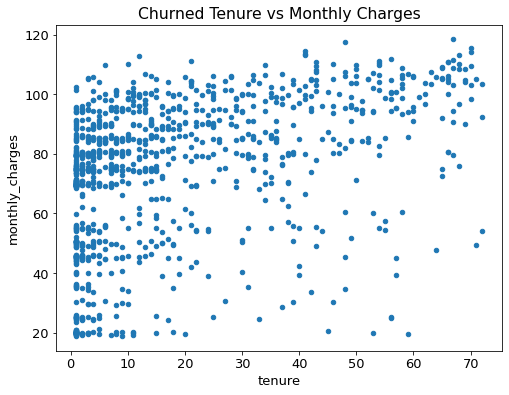

In [141]:
churn_train.plot.scatter('tenure', 'monthly_charges')
plt.title('Churned Tenure vs Monthly Charges')

In [133]:
no_churn_train = train[train.churn == 'No']

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

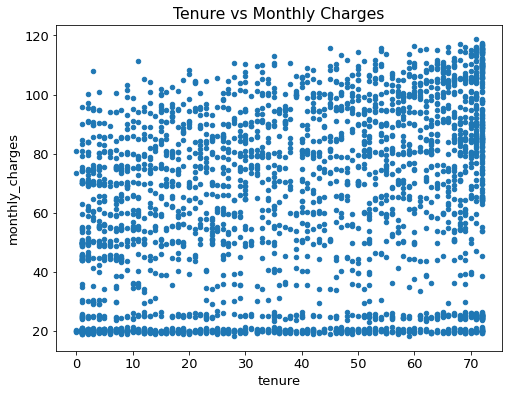

In [128]:
no_churn_train.plot.scatter('tenure', 'monthly_charges')
plt.title('Unchurned Tenure vs Monthly Charges')

In [126]:
# yes, there is a stronger correlation between tenure and monthly charges for those who churn compared to those who did not churnhow